In [371]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

Load all files

In [372]:
order = pd.read_excel('Supply chain logisitcs problem.xlsx', sheet_name = 'OrderList')
freight = pd.read_excel('Supply chain logisitcs problem.xlsx', sheet_name = 'FreightRates')
plant_ports = pd.read_excel('Supply chain logisitcs problem.xlsx', sheet_name = 'PlantPorts')
product_per_plant = pd.read_excel('Supply chain logisitcs problem.xlsx', sheet_name = 'ProductsPerPlant')
vmi_customer = pd.read_excel('Supply chain logisitcs problem.xlsx', sheet_name = 'VmiCustomers')
warehouse_capacity = pd.read_excel('Supply chain logisitcs problem.xlsx', sheet_name = 'WhCapacities')
warehouse_costs = pd.read_excel('Supply chain logisitcs problem.xlsx', sheet_name = 'WhCosts')

Check for null values and duplicate rows

In [373]:
all_info = {"order" : order, "freight" : freight, "plant_ports" : plant_ports, "product_per_plant" : product_per_plant, "vmi_customer" : vmi_customer, "warehouse_capacity" : warehouse_capacity, 
            "warehouse_costs" : warehouse_costs}

for data, data_info in all_info.items():
    print(f"Null Values in {data} : ")
    print(data_info.isnull().sum())
    print("********")

Null Values in order : 
Order ID                0
Order Date              0
Origin Port             0
Carrier                 0
TPT                     0
Service Level           0
Ship ahead day count    0
Ship Late Day count     0
Customer                0
Product ID              0
Plant Code              0
Destination Port        0
Unit quantity           0
Weight                  0
dtype: int64
********
Null Values in freight : 
Carrier         0
orig_port_cd    0
dest_port_cd    0
minm_wgh_qty    0
max_wgh_qty     0
svc_cd          0
minimum cost    0
rate            0
mode_dsc        0
tpt_day_cnt     0
Carrier type    0
dtype: int64
********
Null Values in plant_ports : 
Plant Code    0
Port          0
dtype: int64
********
Null Values in product_per_plant : 
Plant Code    0
Product ID    0
dtype: int64
********
Null Values in vmi_customer : 
Plant Code    0
Customers     0
dtype: int64
********
Null Values in warehouse_capacity : 
Plant ID           0
Daily Capacity     0
dtype:

In [374]:
for data, data_info in all_info.items():
    print(f"Duplicated Values in {data} : {data_info.duplicated().sum()}")

Duplicated Values in order : 0
Duplicated Values in freight : 3
Duplicated Values in plant_ports : 0
Duplicated Values in product_per_plant : 0
Duplicated Values in vmi_customer : 0
Duplicated Values in warehouse_capacity : 0
Duplicated Values in warehouse_costs : 0


In [375]:
freight.drop_duplicates(inplace=True)

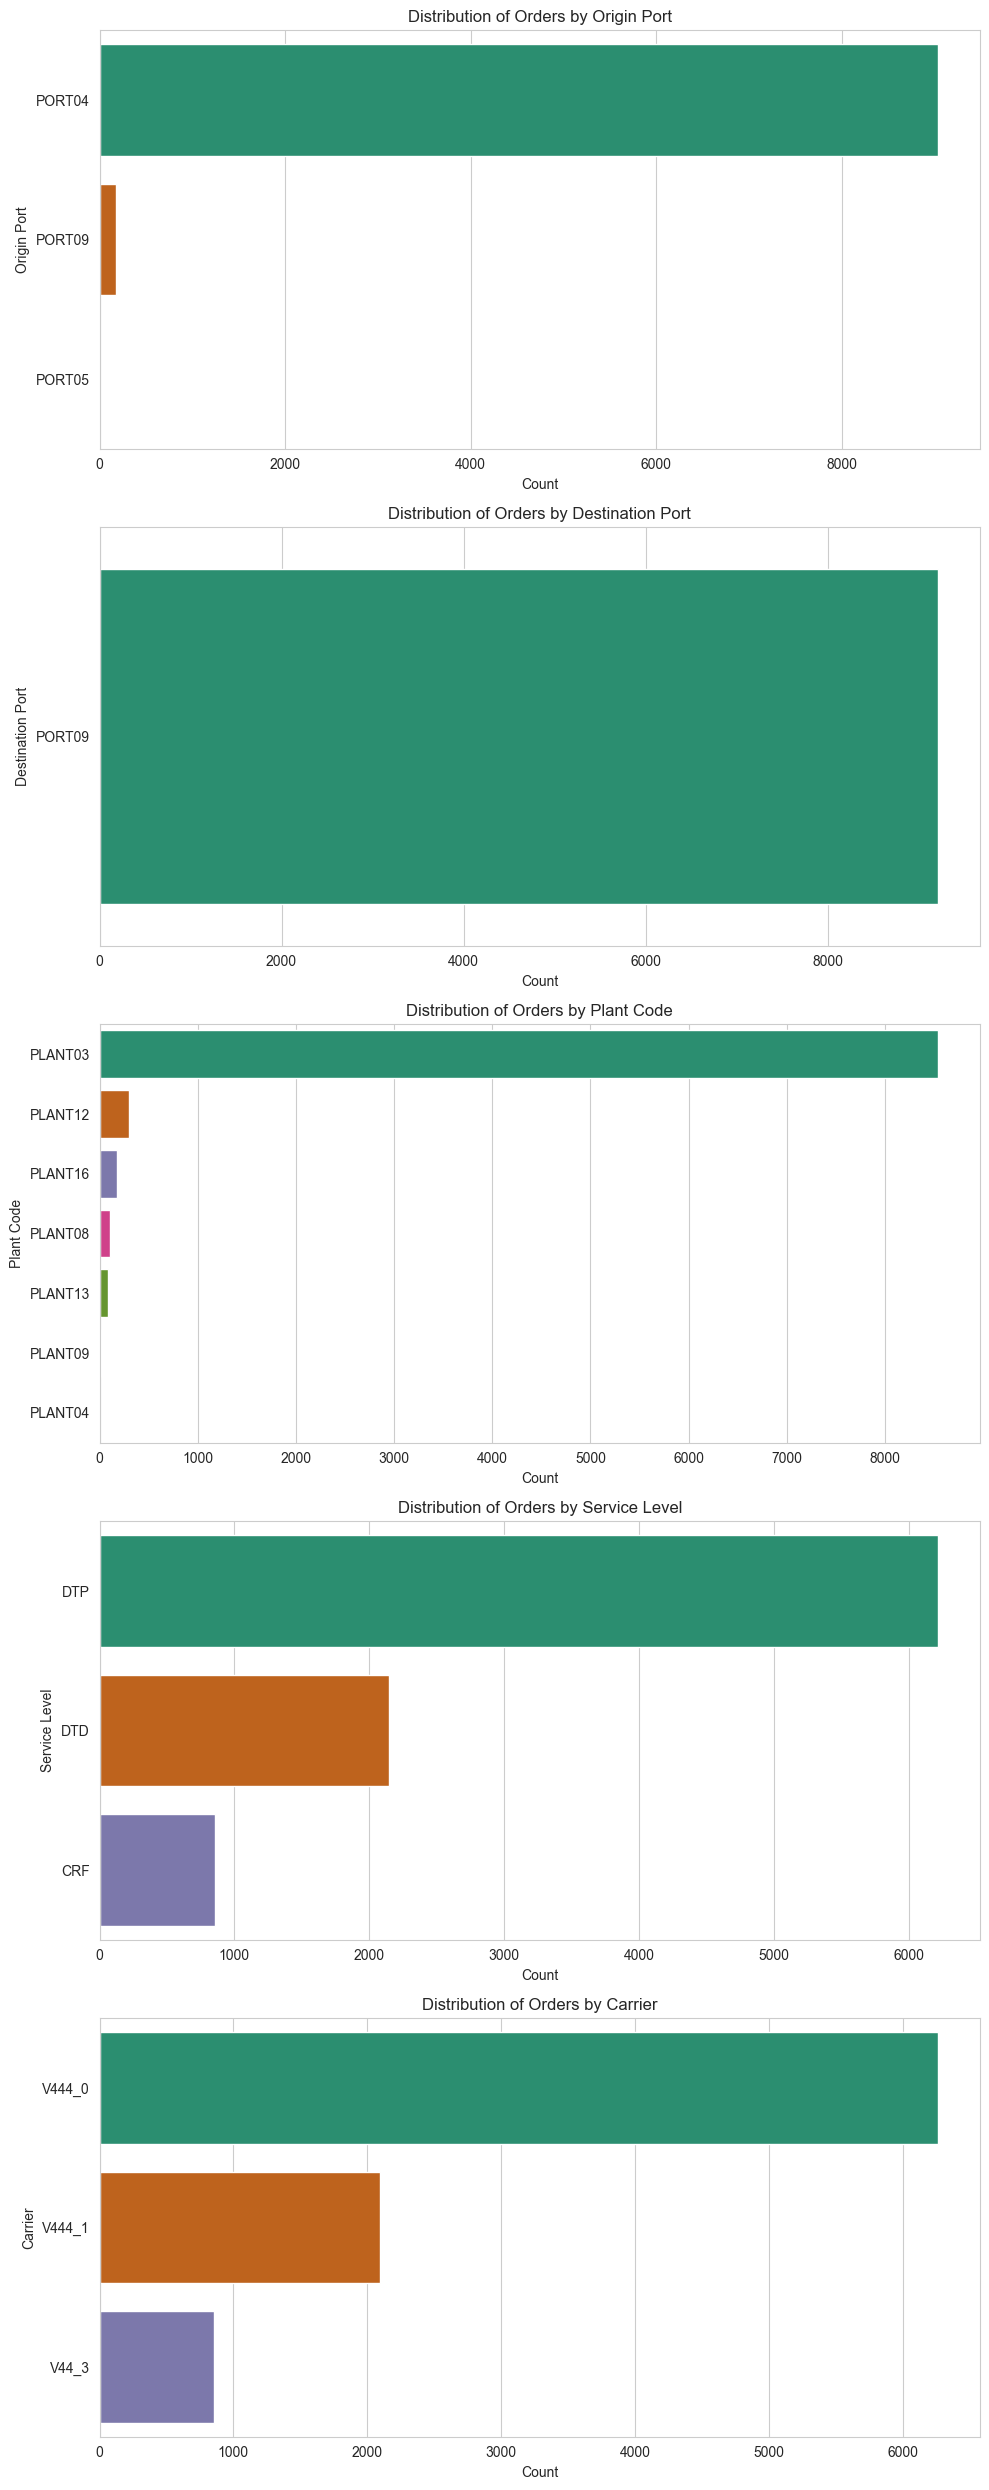

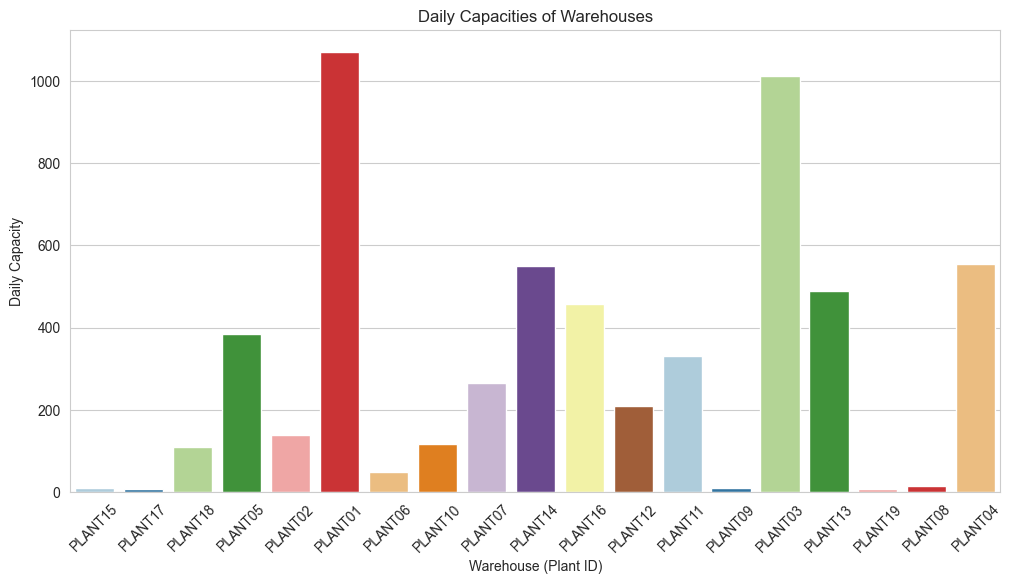

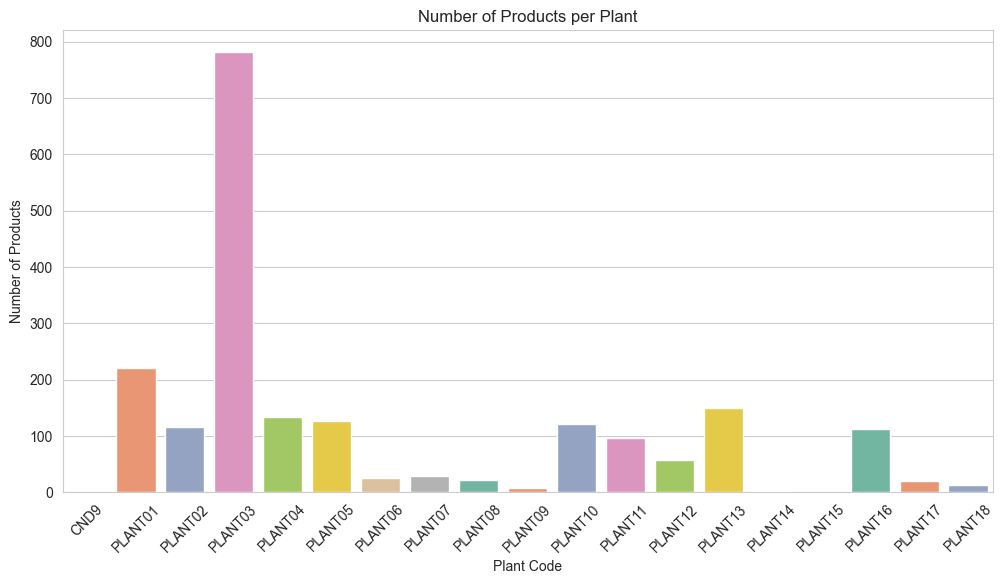

In [376]:
categorical_features = ['Origin Port', 'Destination Port', 'Plant Code', 'Service Level', 'Carrier']
fig, axes = plt.subplots(len(categorical_features), 1, figsize=(10, 5 * len(categorical_features)))

for i, feature in enumerate(categorical_features):
    sns.countplot(data=order, y=feature, ax=axes[i], order=order[feature].value_counts().index, palette="Dark2")
    axes[i].set_title(f'Distribution of Orders by {feature}')
    axes[i].set_xlabel('Count')
    axes[i].set_ylabel(feature)

plt.tight_layout()
plt.show()

# Warehouse Analysis: Capacity constraints and product distribution
warehouse_capacity.rename(columns={'Daily Capacity ': 'Daily Capacity'}, inplace=True)

# Plotting the capacities of each warehouse
plt.figure(figsize=(12, 6))
sns.barplot(data=warehouse_capacity, x='Plant ID', y='Daily Capacity', palette="Paired")
plt.title('Daily Capacities of Warehouses')
plt.xlabel('Warehouse (Plant ID)')
plt.ylabel('Daily Capacity')
plt.xticks(rotation=45)
plt.show()

# Analyzing the distribution of products per plant
plt.figure(figsize=(12, 6))
products_count_per_plant = product_per_plant.groupby('Plant Code').count()
sns.barplot(x=products_count_per_plant.index, y=products_count_per_plant['Product ID'], palette="Set2")
plt.title('Number of Products per Plant')
plt.xlabel('Plant Code')
plt.ylabel('Number of Products')
plt.xticks(rotation=45)
plt.show()

In [377]:
plant_ports.groupby("Port").count().sort_values(by="Plant Code", ascending=False)


,Plant Code
Port,
PORT04,7
PORT02,3
PORT01,3
PORT06,2
PORT03,1
PORT05,1
PORT07,1
PORT08,1
PORT09,1


* Clearly most of the warehouses are linked to PORT 7

Calculate the average of "minimum quantity", "maximum quantity", "rate" and "minimum cost" for same combination of "Origin Port", "Carrier", "Destination Port".

In [378]:
freight_1 = freight.groupby(['Carrier','orig_port_cd','dest_port_cd']).agg({
    'minm_wgh_qty' : lambda x : sum(x)/len(x),
    'max_wgh_qty' : lambda x : sum(x)/len(x),
    'rate' : lambda x : sum(x)/len(x),
    'minimum cost' : lambda x : sum(x)/len(x)
}).reset_index()

freight_1

,Carrier,orig_port_cd,dest_port_cd,minm_wgh_qty,max_wgh_qty,rate,minimum cost
0,V444_0,PORT02,PORT09,570.000000,20569.990000,0.084480,23.838400
1,V444_0,PORT03,PORT09,0.000000,5000.000000,12.592560,29.292560
2,V444_0,PORT04,PORT09,570.000000,20569.990000,0.052000,2.477200
3,V444_0,PORT09,PORT09,0.000000,5000.000000,12.778400,31.278400
4,V444_1,PORT02,PORT09,197.556000,1190.745000,0.291140,23.557340
5,V444_1,PORT04,PORT09,197.556000,1190.745000,0.242000,20.909780
6,V444_1,PORT05,PORT09,170.130000,1001.952500,0.457895,35.954091
7,V444_1,PORT06,PORT09,45.473493,111.272697,2.492247,6.917300
8,V444_1,PORT10,PORT09,78.945000,12570.433750,0.431400,12.350850
9,V444_2,PORT02,PORT09,570.000000,20569.990000,0.079040,9.027200


Total cost of order fulfillment

In [379]:
shipping_cost = pd.merge(order, freight_1, how="left", left_on=["Origin Port", "Carrier", "Destination Port"], right_on=["orig_port_cd", "Carrier", "dest_port_cd"])
shipping_cost["Shipment Cost"] = shipping_cost["Unit quantity"] * shipping_cost["rate"]
shipping_cost.dropna(inplace=True)

# update shipment cost to minimum cost if intitally the calculated shipment cost is less than the minimum cost
shipping_cost["Shipment Cost"] = shipping_cost.apply(lambda row: max(row["Shipment Cost"], row["minimum cost"]), axis=1)

total_order_cost = pd.merge(shipping_cost, warehouse_costs, how="left", left_on="Plant Code", right_on="WH")
total_order_cost["Total Order Cost"] = total_order_cost["Shipment Cost"] + (total_order_cost["Unit quantity"] * total_order_cost["Cost/unit"])

In [380]:
total_order_cost.to_csv("total_order_cost.csv")

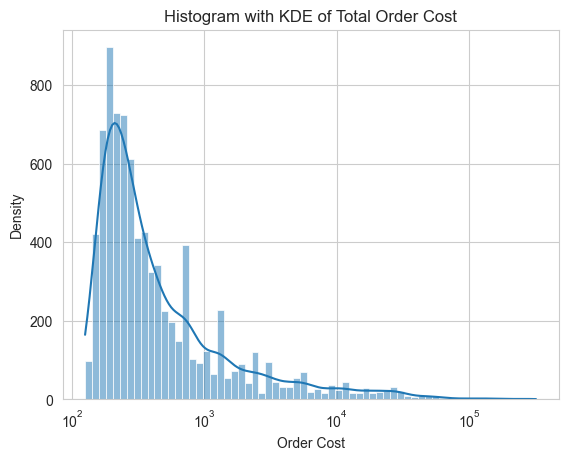

In [381]:
# Plot histogram with KDE of Order Cost'
sns.histplot(total_order_cost["Total Order Cost"], kde=True, log_scale=True)
plt.xlabel('Order Cost')
plt.ylabel('Density')
plt.title('Histogram with KDE of Total Order Cost')
plt.grid(True)
plt.show()


<Axes: ylabel='Total Order Cost'>

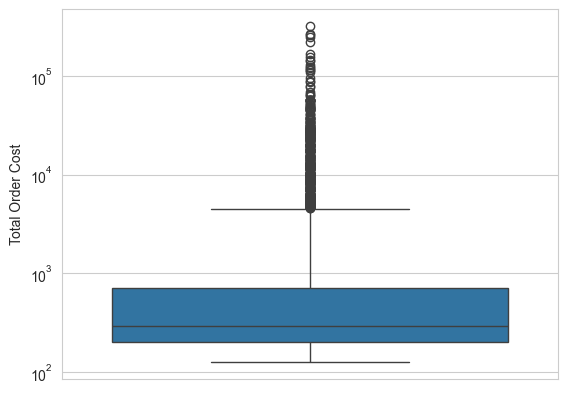

In [382]:
sns.boxplot(data=total_order_cost["Total Order Cost"],log_scale=True)

Text(0.5, 1.0, 'Correlation Heatmap')

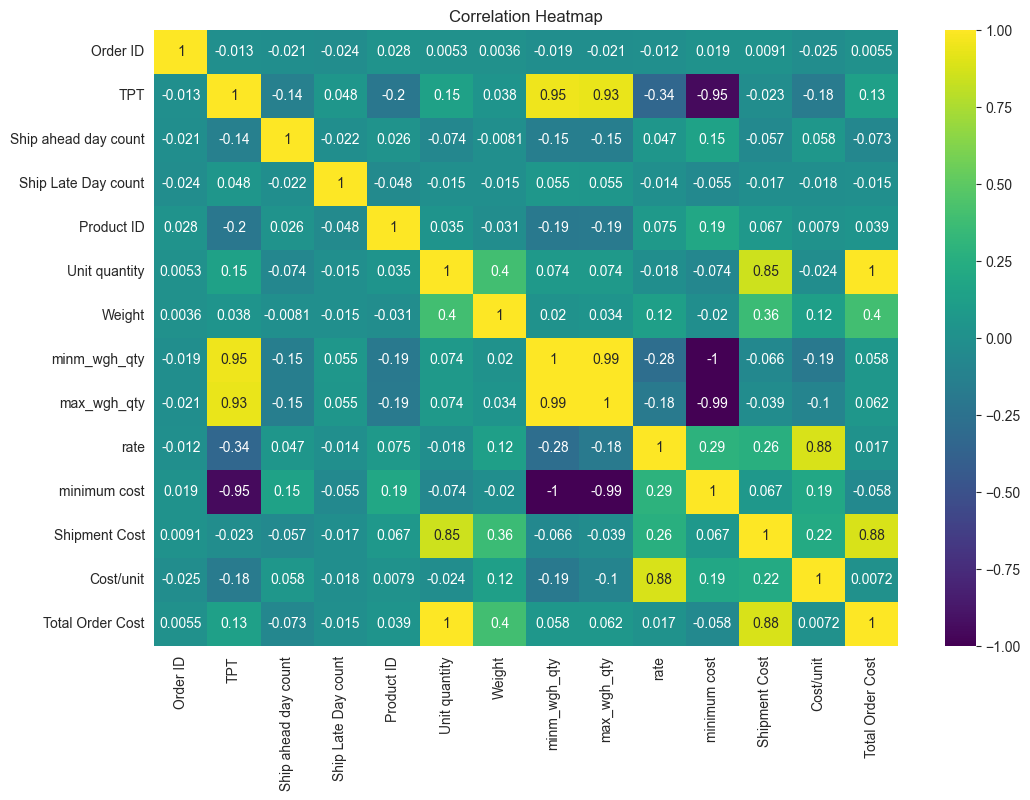

In [383]:
plt.figure(figsize=(12, 8))
sns.heatmap(total_order_cost.corr(numeric_only=True), annot=True, cmap='viridis', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')

Warehouse Capacity Utilization

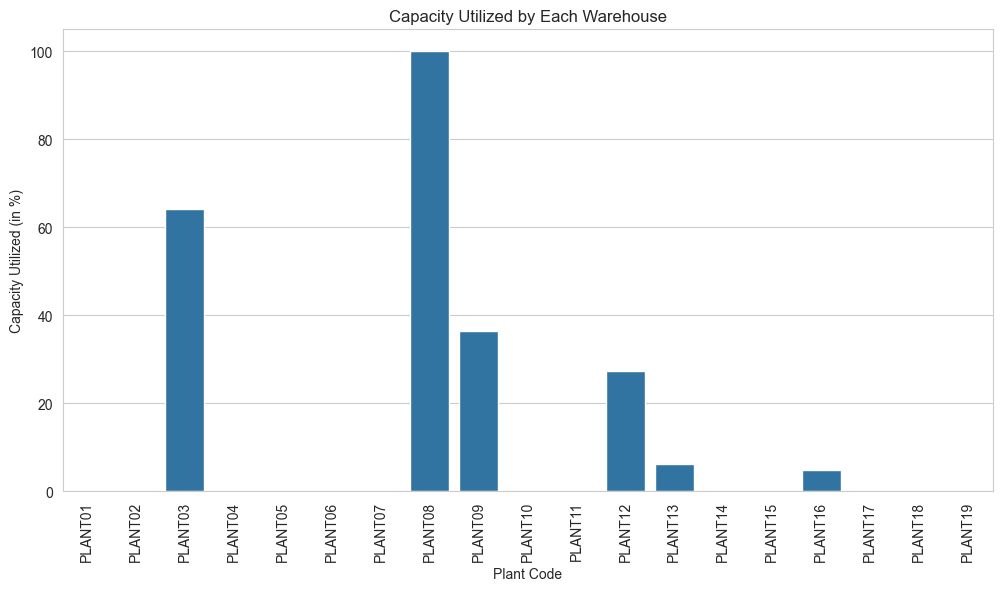

In [384]:
# Count orders per plant code
order_counts = order.groupby(by=['Plant Code'])["Product ID"].nunique().reset_index(name='Order Count')
order_counts.columns = ['Plant Code', 'Order Count']

# Aggregate daily capacity per plant
capacity_per_plant = warehouse_capacity.groupby(by=["Plant ID"]).sum().reset_index()
capacity_per_plant.columns = ['Plant Code', 'Daily Capacity']

# Merge order counts and capacity dataframes
warehouse_cap_utilise = pd.merge(order_counts, capacity_per_plant, on='Plant Code', how='right')
warehouse_cap_utilise.fillna(value=0, inplace=True)
warehouse_cap_utilise["Capacity Utilized"] = (warehouse_cap_utilise["Order Count"]/warehouse_cap_utilise["Daily Capacity"]) * 100

plt.figure(figsize=(12, 6))
sns.barplot(x='Plant Code', y='Capacity Utilized', data=warehouse_cap_utilise)
plt.xticks(rotation=90)
plt.xlabel('Plant Code')
plt.ylabel('Capacity Utilized (in %)')
plt.title('Capacity Utilized by Each Warehouse')
plt.show()

Average Freight costs per unit for each route

In [385]:
freight.to_csv("freight_info.csv")

Text(0.5, 1.0, 'Average Rate For Each Unit')

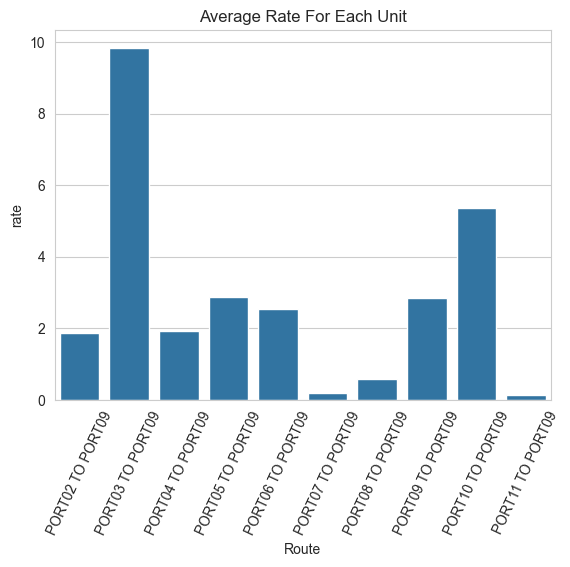

In [386]:
avg_freight_cost = freight.groupby(by=["orig_port_cd", "dest_port_cd"]).agg({"rate" : "mean"}).reset_index()
avg_freight_cost["Route"] = avg_freight_cost["orig_port_cd"] + " TO " + avg_freight_cost["dest_port_cd"]
sns.barplot(data=avg_freight_cost, x="Route", y="rate")
plt.xticks(rotation=65)
plt.title('Average Rate For Each Unit')

lp

In [387]:
warehouse_costs.to_csv("warehouse_costs.csv")
warehouse_capacity.to_csv("warehouse_capacity.csv")
vmi_customer.to_csv("vmi_customer.csv")
product_per_plant.to_csv("product_per_plant.csv")
plant_ports.to_csv("plant_ports.csv")
order.to_csv("supply_chain_cleaned_1.csv")

In [388]:
order.set_index("Order ID", inplace=True)

In [389]:
# given a order id, return the plants that can produce the corresponding products
def product_restriction(index):
    data = order.loc[index]
    product_id = data["Product ID"]
    possible_plants = product_per_plant.loc[product_per_plant["Product ID"] == product_id]
    return np.array(possible_plants["Plant Code"])

In [390]:
# vmi restriction: check if a given customer has to be serviced by a specific facility, else return all facilities as possibilities.
def customer_restriction(index):
    data = order.loc[index]
    Customer_id = data["Customer"]
    possible_plants = vmi_customer.loc[vmi_customer["Customers"] == Customer_id]
    if list(possible_plants["Plant Code"]) == []:
        possible_plants = plant_ports.loc[plant_ports["Port"] == data["Origin Port"]]
        return np.array(possible_plants["Plant Code"])
    else:
        return np.array(possible_plants["Plant Code"])

In [391]:
# combine both the product and vmi restriction
def check_order(Order_Id, length=True):
    if length:
        return len(np.intersect1d(customer_restriction(Order_Id), product_restriction(Order_Id)))
    else:
        return np.intersect1d(customer_restriction(Order_Id), product_restriction(Order_Id))

In [392]:
# for the above restrcitions, we can calculate the number of facilities that can process a given order.
order["Possible Plant Counts"] = np.array(list(map(check_order, order.index)))

In [393]:
order["Possible Plant Counts"].value_counts()

Possible Plant Counts
1    6900
2    1270
0    1045
Name: count, dtype: int64

* For 1045 order, there is no facility that can handle the order for given problem restictions. So we will drop those rows.

In [394]:
order_new = order[order["Possible Plant Counts"] > 0]

In [395]:
ports_agg = freight.groupby(["orig_port_cd"]).agg(avg_rate=("rate", np.mean))

In [396]:
# return the possible plants that can process the order.
order_new["Possible Plants"] = np.array((map(lambda x: check_order(x, length=False), order_new.index)))

In [397]:
warehouse_costs.set_index("WH", inplace=True)

In [398]:
# given a port and the order specifications return the carrier that can handle the product at the best price.
def find_best_port(plant_id):
    # choose the ports that have a connection to the given plant and then find the port with the lowest freight rate
    possible_ports = plant_ports.loc[(plant_ports["Plant Code"] == plant_id) & (plant_ports.Port != "PORT01"), "Port"]
    possible_ports = ports_agg.loc[possible_ports]
    return possible_ports.loc[possible_ports["avg_rate"] == min(possible_ports["avg_rate"])].iloc[0]["avg_rate"], possible_ports.loc[possible_ports["avg_rate"] == min(possible_ports["avg_rate"])].iloc[0].name

In [399]:
def min_cost(possible_plants):
    
    plant_port_cost = {}
    
    min_cost = np.inf
    
    for plant in possible_plants:
        plant_port_cost[plant] = warehouse_costs.loc[plant].iloc[0] 
        port_price, port = find_best_port(plant)
        plant_port_cost[plant] += port_price
        
        if plant_port_cost[plant] < min_cost:
            min_cost = plant_port_cost[plant]
            best_plant = plant
            best_port = port
            best_port_price = port_price
        
    return min_cost, best_plant, best_port_price, best_port

In [400]:
order_new["Best Route"] = order_new["Possible Plants"].apply(min_cost)

In [401]:
order_new["Efficient Total Cost"] = order_new["Best Route"].apply(lambda x : x[0])
order_new["Efficient Total Cost"] = order_new["Unit quantity"] * order_new["Efficient Total Cost"]

order_new["Efficient Freight Cost"] = order_new["Best Route"].apply(lambda x : x[2])
order_new["Efficient Freight Cost"] = order_new["Unit quantity"] * order_new["Efficient Freight Cost"]
order_new["Efficient WareHouse"] = order_new["Best Route"].apply(lambda x : x[1])
order_new["Efficient Port"] = order_new["Best Route"].apply(lambda x : x[3])
order_new

,Order Date,Origin Port,Carrier,TPT,Service Level,Ship ahead day count,Ship Late Day count,Customer,Product ID,Plant Code,Destination Port,Unit quantity,Weight,Possible Plant Counts,Possible Plants,Best Route,Efficient Total Cost,Efficient Freight Cost,Efficient WareHouse,Efficient Port
Order ID,,,,,,,,,,,,,,,,,,,,
1.447296e+09,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,808,14.300000,1,[PLANT16],"(4.7563741745191, PLANT16, 2.8365666666666662,...",3843.150333,2291.945867,PLANT16,PORT09
1.447158e+09,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,3188,87.940000,1,[PLANT16],"(4.7563741745191, PLANT16, 2.8365666666666662,...",15163.320868,9042.974533,PLANT16,PORT09
1.447139e+09,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,2331,61.200000,1,[PLANT16],"(4.7563741745191, PLANT16, 2.8365666666666662,...",11087.108201,6612.036900,PLANT16,PORT09
1.447364e+09,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,847,16.160000,1,[PLANT16],"(4.7563741745191, PLANT16, 2.8365666666666662,...",4028.648926,2402.571967,PLANT16,PORT09
1.447364e+09,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,2163,52.340000,1,[PLANT16],"(4.7563741745191, PLANT16, 2.8365666666666662,...",10288.037339,6135.493700,PLANT16,PORT09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1.447372e+09,2013-05-26,PORT04,V444_1,1,DTD,5,0,V55555555555555_8,1690628,PLANT03,PORT09,247,0.415441,1,[PLANT02],"(10.321903518927222, PLANT02, 9.8444, PORT03)",2549.510169,2431.566800,PLANT02,PORT03
1.447372e+09,2013-05-26,PORT04,V444_1,1,DTD,5,0,V55555555555555_8,1690628,PLANT03,PORT09,352,1.038603,1,[PLANT02],"(10.321903518927222, PLANT02, 9.8444, PORT03)",3633.310039,3465.228800,PLANT02,PORT03
1.447328e+09,2013-05-26,PORT04,V444_1,1,DTD,5,0,V55555555555555_8,1690628,PLANT03,PORT09,343,0.692402,1,[PLANT02],"(10.321903518927222, PLANT02, 9.8444, PORT03)",3540.412907,3376.629200,PLANT02,PORT03


In [402]:
order_new.to_csv("supply_chain_cleaned_2.csv")